<font face="Computer Modern", size = 3>

Notes: YOU'RE AN IDIOT!!!




In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.linalg import toeplitz
import matplotlib.gridspec as gridspec
import itertools as it
import sys
sys.path.append('../../../Documents/exponential_glm/PyGLM')
import glm_model as gm
from glm_utils import *

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
stim, weights, y  = generate_data(T = 10000)

ys = [gam_model(weights, stim, scale, c) for i in range(500)]

W_ls = np.linalg.pinv(stim).dot(y)

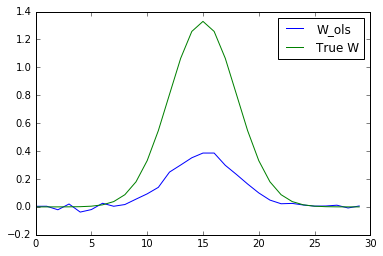

In [37]:
l1, = plt.plot(W_ls, 'b', label = 'W_ols')
l2, = plt.plot(weights, 'g', label = 'True W')
plt.legend(handles = [l1, l2])


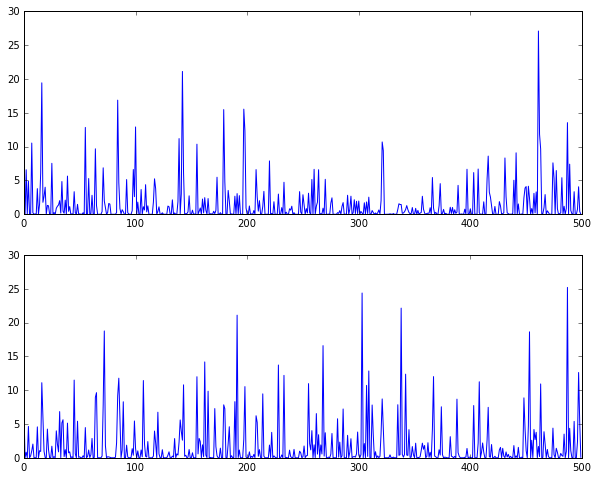

In [45]:
#### visualize some traces 
num_rows, num_cols = 2, 1

fig = plt.figure(figsize=(10,8))

gs = gridspec.GridSpec(num_rows, num_cols, wspace=0.0)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
for i,t in enumerate(ys[0:num_rows*num_cols]):
    ax[i].plot(t[0:500])
    #ax[i].axis('off')

plt.show()

In [39]:
params_init = np.random.uniform(1, 5, size = [3, 1])

GLM = gm.exponential_GLM(n, W_ls.reshape([n, 1]).astype('float32'), 
                        max_iters = 300, scale_init = params_init[0], 
                       bias_init = params_init[2], non_lin = tf.sigmoid, 
                         lr = 1e-2,  alpha = 0)

l = GLM.fit(stim, y, batch_size = T) 

0%                          100%
[******************************] | ETA: 00:00:00
Total time elapsed: 00:00:05


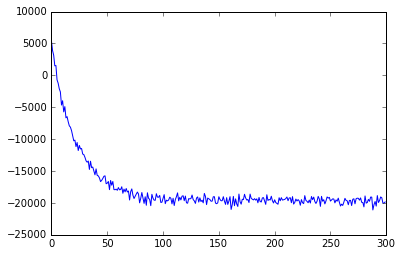

In [40]:
plt.plot(l)

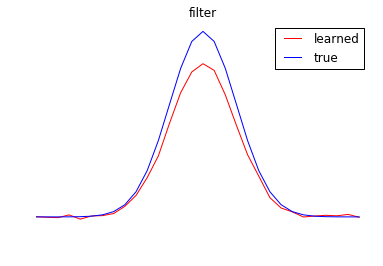

In [51]:
w_learned = GLM.weights.eval(GLM.sess)

l1, = plt.plot(w_learned, 'r', label = 'learned')
l2, = plt.plot(weights, 'b', label = 'true')
plt.axis('off')
plt.title('filter')
plt.legend(handles = [l1, l2])

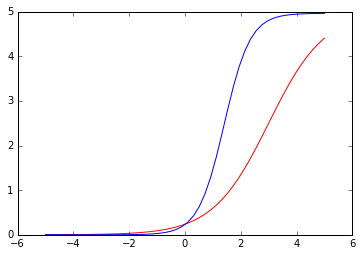

In [42]:
sc, off = GLM.scale.eval(GLM.sess), GLM.offset.eval(GLM.sess)

x = np.linspace(-5, 5)

plt.plot(x, scale*sigmoid(slope*x - c), 'r')
plt.plot(x, sc*sigmoid(sl*x - off), 'b' )

In [47]:
w_init = GLM2.weights.eval(GLM2.sess)

In [85]:
T = 100

#stimulus
stim_test = np.random.normal(0, scale = 2, size = [T, n])

In [28]:
lam_true = conditional_intensity(weights, stim_test, scale, c)
lam_est = conditional_intensity(weights, stim_test, sc, off)

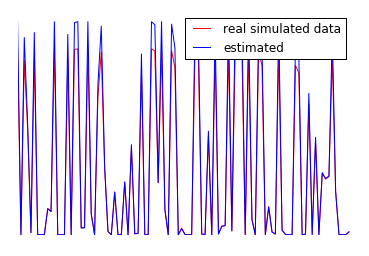

In [50]:
plt.plot(lam_true, 'r', label = 'real simulated data')
plt.plot(lam_est, 'b', label = 'estimated')
plt.axis('off')
plt.legend()


In [14]:
#rando parameters
T = 100

#stimulus
stim_test = np.random.normal(0, scale = 2, size = [T, n])
